In [1]:
import xarray as xr
import numpy as np
import os.path as op
import dask.array as dsar
from dask.diagnostics import ProgressBar
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tdir = '/swot/SUM05/takaya/MITgcm/channel/runs'
sdir = '/swot/SUM05/takaya/SOSE/mon_ave/bgc/'

In [11]:
ys, dy = (20,10)
dt = 3e2
df = 288
ts = int((ys*360*86400)/dt+df)
te = int(((ys+dy)*360*86400)/dt+df)
print(ts,te)

2073888 3110688


In [12]:
ds = open_mdsdataset(op.join(tdir,'deepML-2mon_5kmTtave'), grid_dir=op.join(tdir,'5km_grid'),
                    iters=range(ts-df,te,8640),
                    prefix=['Ttave'], delta_t=dt
                    )
ds

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = X
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 121)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC,

In [13]:
month = np.tile(range(12),dy)
sst = ds.Ttave[:-1,0]
sst.coords['month'] = ('time',month)
sst_mon = sst.groupby('month').mean(['time','XC']).compute()
sst_mon

<xarray.DataArray 'Ttave' (month: 12, YC: 400)>
array([[0.      , 0.779488, 0.791714, ..., 7.925432, 7.940938, 7.956936],
       [0.      , 0.784471, 0.797026, ..., 7.924541, 7.941501, 7.959141],
       [0.      , 0.789348, 0.806713, ..., 7.907077, 7.929696, 7.953194],
       ...,
       [0.      , 0.773478, 0.781967, ..., 7.859703, 7.894822, 7.927732],
       [0.      , 0.774442, 0.78418 , ..., 7.887456, 7.912446, 7.936448],
       [0.      , 0.776934, 0.785427, ..., 7.911939, 7.930199, 7.94847 ]],
      dtype=float32)
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    Z        >f4 -0.5
    drF      float32 1.0
    PHrefC   float32 4.905
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


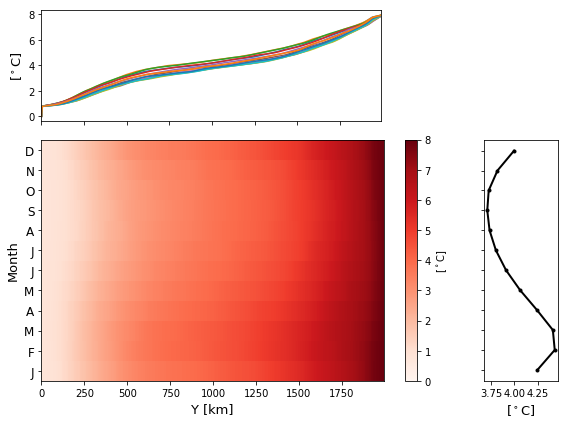

In [18]:
mon = ['J','F','M','A','M','J','J','A','S','O','N','D']
fig = plt.figure(figsize=(8,6))
fig.set_tight_layout(True)

ax1 = plt.subplot2grid((6,6),(0,0),colspan=4,rowspan=2)
ax2 = plt.subplot2grid((6,6),(2,0),rowspan=4,colspan=5)
ax3 = plt.subplot2grid((6,6),(2,5),rowspan=4)

for i in range(12):
    ax1.plot(np.arange(0,2000,5), sst_mon[i])
ax1.set_xlim([0,2e3-10])
# ax1.plot(range(200),5.05*np.ones(200), 'k--')
# ax1.plot(range(200),8.*np.ones(200), 'k--')
ax1.set_ylabel(r'[$^\circ$C]', fontsize=13)
ax1.set_xticklabels([])
im = ax2.pcolormesh(np.arange(0,2000,5), np.arange(13), sst_mon[:], 
                   vmax=8e0, cmap='Reds', rasterized=True)
ax2.set_yticks(np.arange(.5,12.5,1))
ax2.set_yticklabels(mon, fontsize=12)
ax2.set_ylabel(r"Month", fontsize=13)
ax2.set_xlabel(r"Y [km]", fontsize=13)
ax3.plot(sst_mon.sel(YC=slice(5e5,15e5)).mean(axis=-1), range(1,13), 'k.-', lw=2)
ax3.set_xlabel(r'[$^\circ$C]', fontsize=13)
# ax3.set_ylim([1,12])
ax3.set_yticks(range(1,13))
ax3.set_yticklabels([])

cbar = fig.colorbar(im, ax=ax2)
cbar.set_label(r'[$^\circ$C]')

plt.savefig(op.join(tdir,'Figures/SSTseasonalityresult_zero-res_05km.pdf'))

In [24]:
ds = xr.open_dataset(op.join(sdir, 'BSOSE-SST_40-65S_100-140E_rot-8.nc'))
Bsst = ds.SST

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


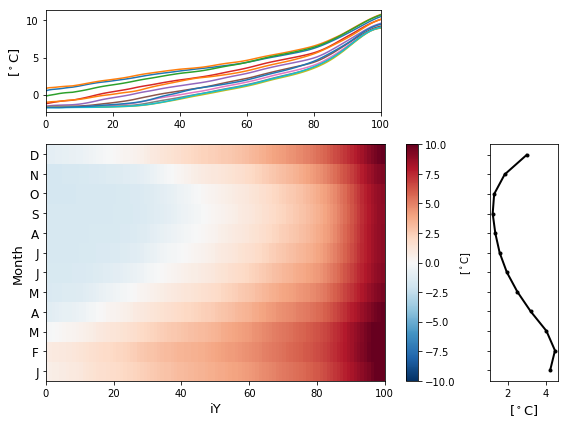

In [29]:
mon = ['J','F','M','A','M','J','J','A','S','O','N','D']
# colors = ['m','olive','g','c','b','indigo','purple','brown','orange','y','pink','r']
fig = plt.figure(figsize=(8,6))
fig.set_tight_layout(True)

ax1 = plt.subplot2grid((6,6),(0,0),colspan=4,rowspan=2)
ax2 = plt.subplot2grid((6,6),(2,0),rowspan=4,colspan=5)
ax3 = plt.subplot2grid((6,6),(2,5),rowspan=4)

for i in range(12):
    ax1.plot(Bsst.sel(iY=slice(None,100)).iY, Bsst.sel(iY=slice(None,100))[i])
ax1.set_xlim([Bsst.sel(iY=slice(None,100)).iY.min(),
              Bsst.sel(iY=slice(None,100)).iY.max()])
ax1.set_ylabel(r'[$^\circ$C]', fontsize=13)
# ax1.set_xticklabels([])
im = ax2.pcolormesh(Bsst.sel(iY=slice(None,100)).iY, np.arange(13), Bsst.sel(iY=slice(None,100)), 
                   vmax=1e1, vmin=-1e1, cmap='RdBu_r', rasterized=True)
ax2.set_yticks(np.arange(.5,12.5,1))
ax2.set_yticklabels(mon, fontsize=12)
ax2.set_ylabel(r"Month", fontsize=13)
ax2.set_xlabel(r"iY", fontsize=13)
ax3.plot(Bsst.sel(iY=slice(None,100)).mean('iY'), range(1,13), 'k.-', lw=2)
ax3.set_xlabel(r'[$^\circ$C]', fontsize=13)
# ax3.set_ylim([1,12])
ax3.set_yticks(range(1,13))
ax3.set_yticklabels([])

cbar = fig.colorbar(im, ax=ax2)
cbar.set_label(r'[$^\circ$C]')

plt.savefig(op.join(sdir,'BSOSE_SSTmonclim.pdf'))